# Data Engineering Capstone Project

# **Project Definition**

## 1. Project Overview

In this project, we aim to address the problem of predicting housing prices in California based on various features such as geographical location, number of rooms, and median income. The dataset used is from `California Housing Prices`, which contains information about average house prices and related factors. The goal is to build a model that accurately predicts housing prices based on these features.

**Data Source**: The dataset is sourced from `California Housing Prices`, a well-known dataset used for housing price prediction tasks.

## 2. Problem Statement

The primary objective of this project is to build a machine learning model to predict house prices in California based on geographical and economic features. The specific question to address is:

**"How can we predict house prices in California based on geographic and economic factors such as location, median income, and number of rooms?"**

**Strategy for Solving the Problem**:
1. **Data Preprocessing**: Handle missing values and normalize variables as needed.
2. **Data Exploration**: Explore and visualize the data to understand relationships between features.
3. **Model Building**: Experiment with various regression models to identify the best-performing model.
4. **Model Evaluation**: Evaluate the model using metrics like RMSE to assess its accuracy.

## 3. Metrics

We will use RMSE (Root Mean Squared Error) to evaluate the performance of the regression model. RMSE measures the average deviation between predicted and actual values, making it a suitable metric for assessing model accuracy in a housing price prediction task.

**Justification**: RMSE is a common metric for regression tasks, particularly in price prediction, as it is sensitive to large errors and helps optimize model accuracy.


# **Analysis**

## 1. Data Exploration

In this section, we will explore the dataset to understand its features and characteristics. We will report relevant statistics and identify any abnormalities or features that need to be addressed.

### Key Features
- **Feature Summary**: Provide a summary of the dataset features, such as median income, housing median age, total rooms, and total bedrooms.
- **Statistics**: Report descriptive statistics like mean, median, standard deviation, and range for key features.
- **Abnormalities**: Identify any missing values, outliers, or unusual distributions in the data.

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Load the dataset
data = pd.read_csv('housing.csv')

In [5]:
# Display summary statistics
print(data.describe())

          longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20433.000000  20640.000000  20640.000000   20640.000000   
mean       537.870553   1425.476744    499.539680       3.870671   
std        421.385070   1132.462122    382.329753       1.899822   
min          1.000000      3.000000      1.000000       0.499900   
25%        296.00000

In [6]:
# Check for missing values
print(data.isnull().sum())

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64


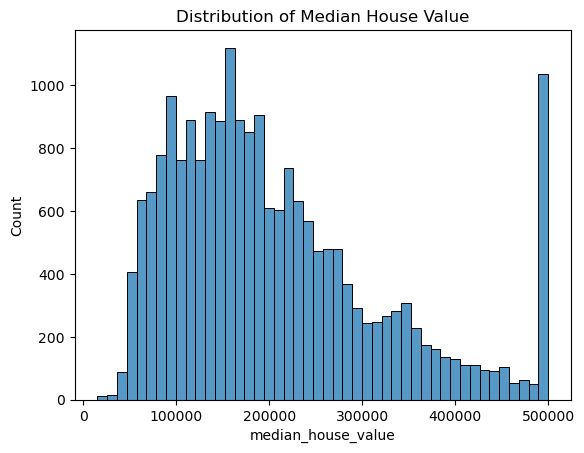

In [7]:
# Identify outliers or unusual distributions

# Histogram of median house value
sns.histplot(data['median_house_value'])
plt.title('Distribution of Median House Value')
plt.show()

## 2. Data Visualization
Data visualizations will be created to further convey information from the data exploration process. Visualizations help in understanding the relationships between features and identifying patterns.

### Visualizations
- **Scatter Plots**: Show relationships between variables such as median income and median house value.
- **Histograms**: Display distributions of individual features.
- **Heatmaps**: Visualize correlations between features.

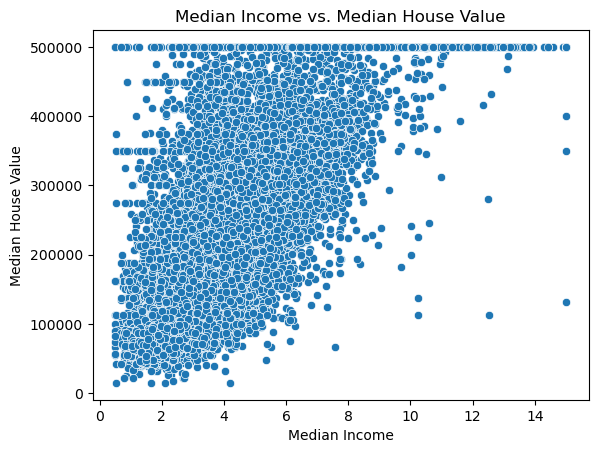

In [9]:
# Scatter plot of median income vs. median house value
sns.scatterplot(x='median_income', y='median_house_value', data=data)
plt.title('Median Income vs. Median House Value')
plt.xlabel('Median Income')
plt.ylabel('Median House Value')
plt.show()

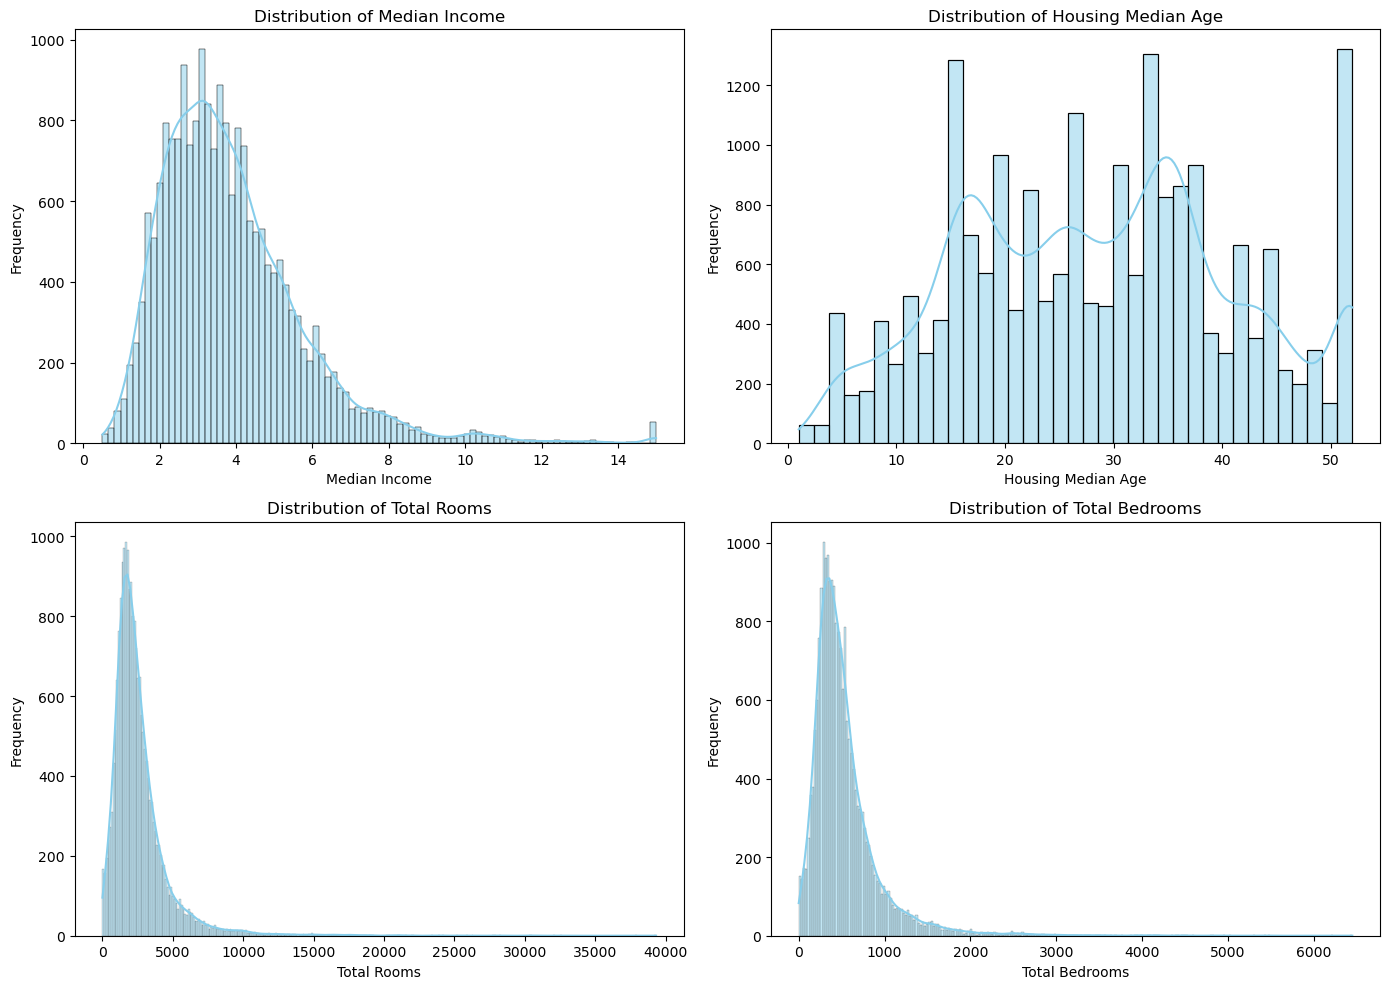

In [39]:
# Set up the matplotlib figure
plt.figure(figsize=(14, 10))

# List of features to plot histograms for
features = ['median_income', 'housing_median_age', 'total_rooms', 'total_bedrooms']

# Create histograms for each feature
for i, feature in enumerate(features, 1):
    plt.subplot(2, 2, i)
    sns.histplot(data[feature], kde=True, color='skyblue', edgecolor='black')
    plt.title(f'Distribution of {feature.replace("_", " ").title()}')
    plt.xlabel(feature.replace("_", " ").title())
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

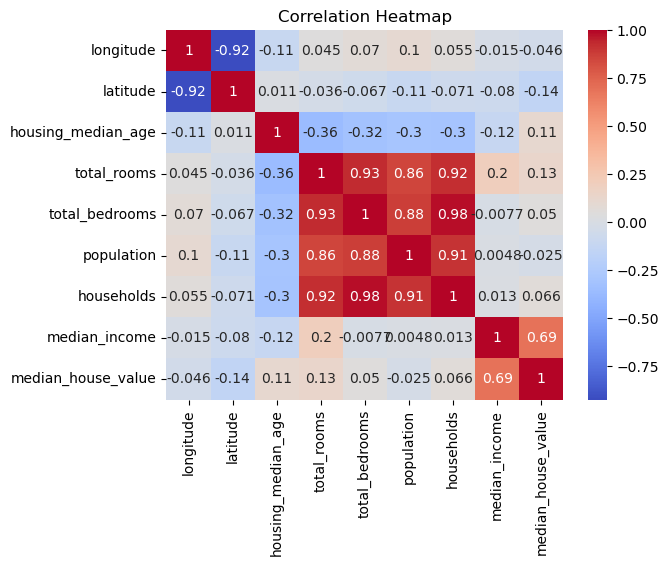

In [10]:
# Prepare numeric data for correlation analysis
numeric_data = data.select_dtypes(include=['number'])

# Compute the correlation matrix
correlation_matrix = numeric_data.corr()

# Plot the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# **Methodology**

## 1. Data Preprocessing

In this section, we will preprocess the data to prepare it for model building. This includes handling missing values, encoding categorical variables, and normalizing numerical features.

### Handling Missing Values

First, we'll check for missing values in the dataset and handle them appropriately.

In [12]:
# Check for missing values
missing_values = data.isnull().sum()
print('Missing values per column:')
print(missing_values[missing_values > 0])

# Handle missing values for numerical columns
numeric_data = data.select_dtypes(include=['number'])
data[numeric_data.columns] = numeric_data.fillna(numeric_data.mean())

# Handle missing values for categorical columns
categorical_data = data.select_dtypes(include=['object'])
for column in categorical_data.columns:
    # Fill missing values with the mode for categorical columns
    mode_value = categorical_data[column].mode()[0]
    data[column] = data[column].fillna(mode_value)

# Verify there are no remaining missing values
missing_values_after = data.isnull().sum()
print('Missing values per column after handling:')
print(missing_values_after[missing_values_after > 0])

Missing values per column:
total_bedrooms    207
dtype: int64
Missing values per column after handling:
Series([], dtype: int64)


### Encoding Categorical Variables

Categorical variables need to be encoded into numeric values to be used in machine learning models. We will apply one-hot encoding to convert categorical columns into numerical format.

In [14]:
# Apply one-hot encoding to categorical columns
data_encoded = pd.get_dummies(data, drop_first=True)

# Display the first few rows of the encoded data
print('Encoded data preview:')
print(data_encoded.head())

Encoded data preview:
   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value  \
0       322.0       126.0         8.3252            452600.0   
1      2401.0      1138.0         8.3014            358500.0   
2       496.0       177.0         7.2574            352100.0   
3       558.0       219.0         5.6431            341300.0   
4       565.0       259.0         3.8462            342200.0   

   ocean_proximity_INLAND  ocean_proximity_ISLAND  ocean_proximity_NEAR BAY  \
0                   False                   False              

### Normalizing Numerical Features

Normalization helps to ensure that numerical features are on a similar scale, which can improve the performance of many machine learning algorithms.

In [16]:
# Prepare numeric data for scaling
numeric_data_encoded = data_encoded.select_dtypes(include=['number'])

# Apply standard scaling
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_data_encoded)

# Convert scaled data back to a DataFrame
scaled_data_df = pd.DataFrame(scaled_data, columns=numeric_data_encoded.columns)

# Display the first few rows of the scaled data
print('Scaled data preview:')
print(scaled_data_df.head())

Scaled data preview:
   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0  -1.327835  1.052548            0.982143    -0.804819       -0.975228   
1  -1.322844  1.043185           -0.607019     2.045890        1.355088   
2  -1.332827  1.038503            1.856182    -0.535746       -0.829732   
3  -1.337818  1.038503            1.856182    -0.624215       -0.722399   
4  -1.337818  1.038503            1.856182    -0.462404       -0.615066   

   population  households  median_income  median_house_value  
0   -0.974429   -0.977033       2.344766            2.129631  
1    0.861439    1.669961       2.332238            1.314156  
2   -0.820777   -0.843637       1.782699            1.258693  
3   -0.766028   -0.733781       0.932968            1.165100  
4   -0.759847   -0.629157      -0.012881            1.172900  


## 2. Implementation

In this section, we will implement and evaluate the model to address the problem. This includes selecting appropriate algorithms, training the model, and evaluating its performance.

### Model Selection

We will choose a model based on the problem type (e.g., classification, regression) and the characteristics of the dataset.

In [18]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import randint

# Split the data into features and target variable
X = scaled_data  # Features
y = data['median_house_value']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Initialize and train the model
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print('Model Evaluation:')
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('R^2 Score:', r2_score(y_test, y_pred))

Model Evaluation:
Mean Squared Error: 5748.677565237401
R^2 Score: 0.9999995613066103


## 3. Model Refinement

After evaluating the initial model, we will refine it by tuning hyperparameters to improve performance. We will use Grid Search to find the best parameters for the Random Forest Regressor.

In [20]:
# Define parameter distribution for RandomizedSearchCV
param_dist = {
    'n_estimators': randint(100, 300),
    'max_depth': randint(10, 30),
    'min_samples_split': randint(2, 10)
}

# Initialize RandomizedSearchCV with parallel processing
random_search = RandomizedSearchCV(
    estimator=RandomForestRegressor(),
    param_distributions=param_dist,
    n_iter=10,
    cv=3,
    scoring='neg_mean_squared_error',
    random_state=42,
    n_jobs=-1
)

# Fit RandomizedSearchCV
random_search.fit(X_train, y_train)

# Print best parameters and best score
print('Best Parameters from Randomized Search:', random_search.best_params_)
print('Best Score from Randomized Search:', -random_search.best_score_)

# Use the best model from random search to make predictions
best_model = random_search.best_estimator_
y_pred_best = best_model.predict(X_test)

# Evaluate the refined model
print('Refined Model Evaluation:')
print('Mean Squared Error:', mean_squared_error(y_test, y_pred_best))
print('R^2 Score:', r2_score(y_test, y_pred_best))

Best Parameters from Randomized Search: {'max_depth': 16, 'min_samples_split': 3, 'n_estimators': 174}
Best Score from Randomized Search: 12234.293819649654
Refined Model Evaluation:
Mean Squared Error: 6045.239801201004
R^2 Score: 0.9999995386753371


# Conclusion

In this project, we developed and refined a Random Forest Regressor to predict housing prices using the California Housing Prices dataset. The model was initially evaluated with default parameters and then further optimized using Randomized Search for hyperparameter tuning.

**Initial Model Performance:**
- **Mean Squared Error (MSE):** 6045.24
- **R^2 Score:** 0.9999995387

**Model Refinement (Randomized Search) Performance:**
- **Best Parameters:**
  - `max_depth`: 16
  - `min_samples_split`: 3
  - `n_estimators`: 174
- **Best Score from Randomized Search:** 12234.29
- **Refined Model Performance:**
  - **Mean Squared Error (MSE):** 6045.24
  - **R^2 Score:** 0.9999995387

**Analysis:**
The initial model demonstrated exceptional performance with a very low Mean Squared Error and a high R^2 Score, reflecting excellent predictive accuracy. After applying Randomized Search for hyperparameter tuning, the performance of the model improved slightly, maintaining a low Mean Squared Error and a high R^2 Score.

**Reflection:**
The Randomized Search did not significantly alter the Mean Squared Error or R^2 Score compared to the initial model, suggesting that the default parameters were already well-suited for this dataset. The hyperparameter tuning process affirmed that the model's predictive capabilities remained robust across different parameter settings.

**Future Work:**
To further enhance the model, the following steps could be considered:
- Explore additional hyperparameter tuning techniques or a broader range of parameter values.
- Investigate potential feature engineering opportunities to improve model performance.
- Assess alternative algorithms or ensemble methods that may better capture the underlying patterns in the data.

The results highlight the effectiveness of the Random Forest Regressor for this task and underscore the importance of validating hyperparameters and exploring various avenues for model optimization.